In [1]:
"""***************************** 14h April'23 Assignment *****************************"""

"***************************** 14h April'23 Assignment *****************************"

# Ensemble Techniques And Its Types-4

## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
### usp=share_link

####  Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### dependent and independent data 

In [7]:
X = df.drop(labels=['target'],axis=1)
y=df['target']
X.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [14]:
y[0:3]
#y[0:3]

0    1
1    1
2    1
Name: target, dtype: int64

#### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,max_depth=10)
random_forest.fit(X_train,y_train.values.flatten())

RandomForestClassifier(max_depth=10)

#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [18]:
from sklearn.metrics import classification_report
y_pred = random_forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



<AxesSubplot: >

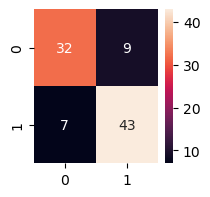

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(mat,annot=True)

#### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.z

In [22]:
random_forest.feature_importances_

array([0.08136001, 0.02609176, 0.10838552, 0.0683722 , 0.07199451,
       0.01185064, 0.01976984, 0.11106746, 0.07897456, 0.11385127,
       0.05420224, 0.15418509, 0.0998949 ])

In [29]:
top_5 = pd.Series(random_forest.feature_importances_)
top_5.index = random_forest.feature_names_in_
top_5 = top_5.sort_values(ascending=False)[0:5]
top_5

ca         0.154185
oldpeak    0.113851
thalach    0.111067
cp         0.108386
thal       0.099895
dtype: float64

<AxesSubplot: >

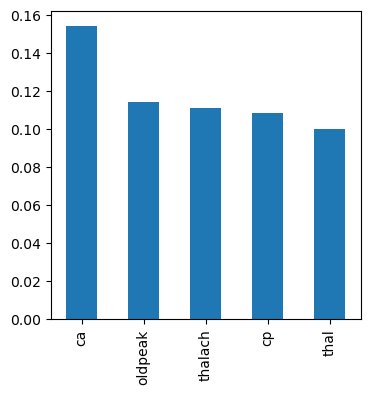

In [32]:
top_5.plot(kind='bar',figsize=(4,4))

#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [33]:
parameters = {
    'n_estimators':[1,10,100],
    'max_depth':[2,4,6]
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5,verbose=2)

In [35]:
random_search.fit(X_train,y_train.values.flatten())

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 6],
                                        'n_estimators': [1, 10, 100]},
                   verbose=2)

#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [36]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 4}

In [37]:
random_search.best_score_

0.8252491694352159

In [51]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
y_pred1 = random_search.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("Precision :",precision_score(y_test,y_pred1))
print("Re-call :",recall_score(y_test,y_pred1))
print("F1_score :",f1_score(y_test,y_pred1))

Accuracy : 0.8351648351648352
Precision : 0.8301886792452831
Re-call : 0.88
F1_score : 0.8543689320388349


#### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [53]:
best = random_search.best_estimator_
best

RandomForestClassifier(max_depth=4)

In [58]:
imp = best.feature_importances_
imp = pd.Series(imp)
imp.index = best.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.167377
cp          0.156477
thal        0.127163
oldpeak     0.124033
thalach     0.098495
exang       0.073906
age         0.067702
slope       0.064033
chol        0.041320
trestbps    0.039562
sex         0.029659
restecg     0.007089
fbs         0.003184
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances'}>

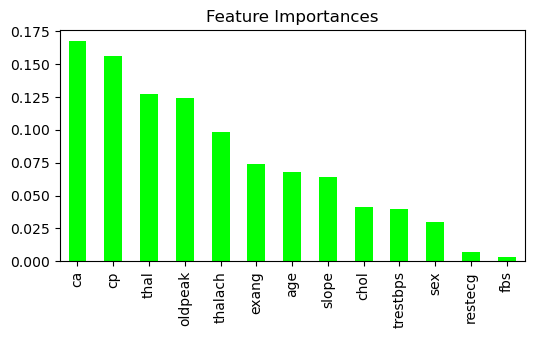

In [63]:
imp.plot(kind='bar',title='Feature Importances',figsize=(6,3),color = "#00FF00")

##### Most imp. is 'CA' & 'CP'

<AxesSubplot: >

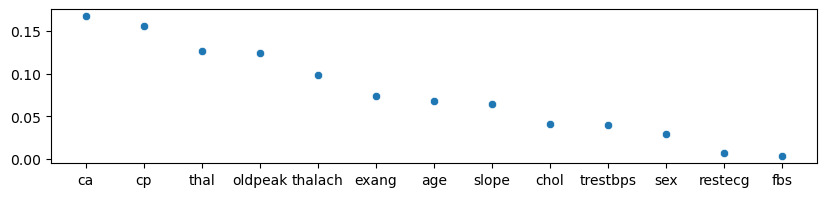

In [88]:
plt.figure(figsize=(9.89,2))
sns.scatterplot(data = imp)